In [1]:
# !pip install h2o

In [6]:
import h2o

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 14.0.2+12-46, mixed mode, sharing)
  Starting server from C:\Users\shrey\anaconda3\envs\test\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\shrey\AppData\Local\Temp\tmphlq4qdr5
  JVM stdout: C:\Users\shrey\AppData\Local\Temp\tmphlq4qdr5\h2o_shrey_started_from_python.out
  JVM stderr: C:\Users\shrey\AppData\Local\Temp\tmphlq4qdr5\h2o_shrey_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,2 months and 1 day
H2O_cluster_name:,H2O_from_python_shrey_yz97v7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.934 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
from h2o.automl import H2OAutoML

In [8]:
churn_df = h2o.import_file('Absenteeism_at_work.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
churn_df.columns

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [9]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [12]:
y = "Absenteeism time in hours"
x = churn_df.columns
x.remove(y)
x.remove("ID")

In [37]:
aml = H2OAutoML(max_models = 3, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [38]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
10:41:16.622: Project: AutoML_20210910_104116622
10:41:16.622: Cross-validation disabled by user: no fold column nor nfolds > 1.
10:41:16.622: Setting stopping tolerance adaptively based on the training frame: 0.045083481733371615
10:41:16.622: Build control seed: 10
10:41:16.622: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
10:41:16.630: training frame: Frame key: automl_training_py_2_sid_ad9e    cols: 21    rows: 442  chunks: 1    size: 10772  checksum: -215008189992864649
10:41:16.630: validation frame: Frame key: py_4_sid_ad9e    cols: 21    rows: 113  chunks: 1    size: 3989  checksum: -3204018120622007462
10:41:16.630: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_ad9e    cols: 21    rows: 50  chunks: 1    size: 2727  checksum: -2878496262761842861
10:41:16.630: blending frame: NULL
10:41:16.630: response column: Absenteeism ti

In [39]:
lb = aml.leaderboard

In [40]:
# List of high performing machine learning models
lb.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DRF_1_AutoML_20210910_104116,190.824,13.8139,190.824,5.59492,0.569459
GBM_1_AutoML_20210910_104116,198.184,14.0778,198.184,6.00418,0.612884
GLM_1_AutoML_20210910_104116,268.866,16.3971,268.866,8.06242,nan


In [41]:
churn_pred=aml.leader.predict(churn_test)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [42]:
aml.leader.model_performance(churn_test)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 216.04057453315494
RMSE: 14.698318765530802
MAE: 5.345000414091446
RMSLE: 0.7365915955071838
Mean Residual Deviance: 216.04057453315494


In [43]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [44]:
model_ids

['DRF_1_AutoML_20210910_104116',
 'GBM_1_AutoML_20210910_104116',
 'GLM_1_AutoML_20210910_104116']

In [53]:
out_1 = h2o.get_model(model_ids[0])
out_1

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20210910_104116


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,35.0,75585.0,14.0,20.0,17.2,147.0,185.0,166.97144




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 137.0822641353724
RMSE: 11.708213533044757
MAE: 5.012522267828187
RMSLE: 0.7636409572239101
Mean Residual Deviance: 137.0822641353724

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 148.55718544738656
RMSE: 12.188403728437393
MAE: 4.696208553187615
RMSLE: 0.6669721172490557
Mean Residual Deviance: 148.55718544738656

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2021-09-10 10:41:17,0.002 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-09-10 10:41:17,0.018 sec,5.0,14.226212,5.875806,202.385111,12.358543,4.862467,152.733597
2,,2021-09-10 10:41:17,0.050 sec,10.0,14.447907,6.049720,208.742009,12.182000,4.746425,148.401117
3,,2021-09-10 10:41:17,0.082 sec,15.0,12.344535,5.398970,152.387551,12.420339,4.672189,154.264809
4,,2021-09-10 10:41:17,0.106 sec,20.0,12.088074,5.254868,146.121537,12.230670,4.736271,149.589298
5,,2021-09-10 10:41:17,0.121 sec,25.0,11.943122,5.205490,142.638157,11.996315,4.613583,143.911569
6,,2021-09-10 10:41:17,0.152 sec,30.0,11.837424,5.112066,140.124613,12.144007,4.651732,147.476906
7,,2021-09-10 10:41:17,0.174 sec,35.0,11.708214,5.012522,137.082264,12.188404,4.696209,148.557185



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Reason for absence,305547.343750,1.000000,0.222126
1,Work load Average/day,191086.640625,0.625391,0.138916
2,Day of the week,122052.937500,0.399457,0.088730
3,Height,113451.367188,0.371305,0.082477
4,Month of absence,107508.406250,0.351855,0.078156
5,Hit target,94650.257812,0.309773,0.068809
6,Age,87561.359375,0.286572,0.063655
7,Seasons,65765.789062,0.215239,0.047810
8,Transportation expense,60047.300781,0.196524,0.043653
9,Weight,47875.652344,0.156688,0.034805


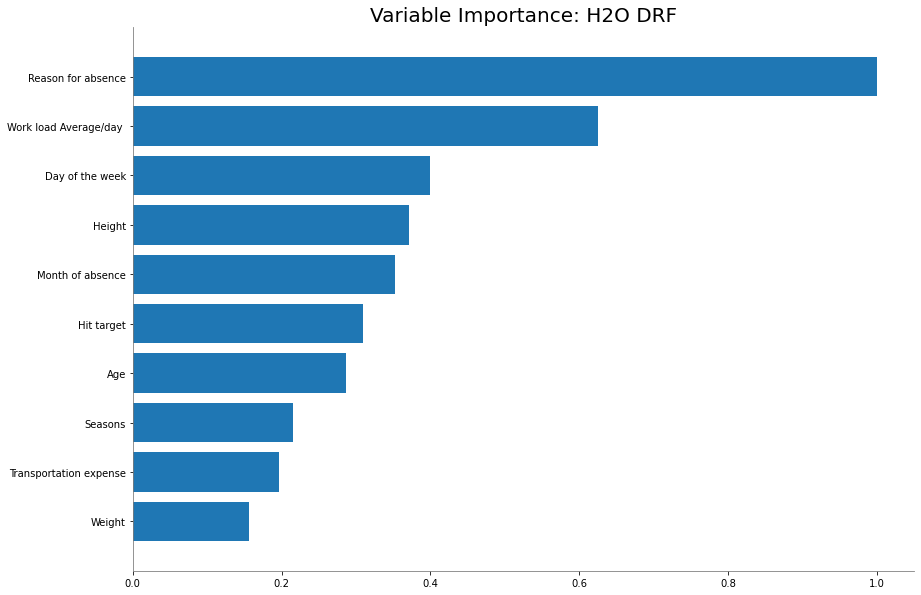

In [52]:
out_1.varimp_plot()

In [54]:
out_2 = h2o.get_model(model_ids[1])
out_2

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20210910_104116


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,35.0,20488.0,6.0,6.0,6.0,26.0,53.0,41.942856




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 12.541342548131848
RMSE: 3.5413757987725405
MAE: 1.8526376652071985
RMSLE: 0.39746719921144946
Mean Residual Deviance: 12.541342548131848

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 150.81494332746118
RMSE: 12.280673569778703
MAE: 5.032199593474534
RMSLE: 0.6995445001760373
Mean Residual Deviance: 150.81494332746118

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2021-09-10 10:41:18,0.000 sec,0.0,12.148645,5.603468,147.589587,13.581799,5.715573,184.465273
1,,2021-09-10 10:41:18,0.024 sec,5.0,9.035967,4.188690,81.648702,12.631686,4.968227,159.559484
2,,2021-09-10 10:41:18,0.053 sec,10.0,7.267686,3.519176,52.819258,11.853016,4.693892,140.493992
3,,2021-09-10 10:41:18,0.069 sec,15.0,5.985276,2.980776,35.823529,11.580429,4.612267,134.106325
4,,2021-09-10 10:41:18,0.085 sec,20.0,5.174389,2.598628,26.774303,11.754650,4.656414,138.171785
5,,2021-09-10 10:41:18,0.093 sec,25.0,4.627600,2.322131,21.414685,11.842568,4.704094,140.246411
6,,2021-09-10 10:41:18,0.125 sec,30.0,4.218948,2.106374,17.799522,12.064945,4.867779,145.562900
7,,2021-09-10 10:41:18,0.139 sec,35.0,3.541376,1.852638,12.541343,12.280674,5.032200,150.814943



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Reason for absence,88912.203125,1.000000,0.273553
1,Work load Average/day,38002.011719,0.427411,0.116920
2,Month of absence,37520.082031,0.421990,0.115437
3,Day of the week,36298.042969,0.408246,0.111677
4,Height,35921.125000,0.404007,0.110517
5,Hit target,18234.091797,0.205080,0.056100
6,Age,12642.119141,0.142187,0.038896
7,Seasons,10976.732422,0.123456,0.033772
8,Weight,10549.073242,0.118646,0.032456
9,Transportation expense,9099.467773,0.102342,0.027996


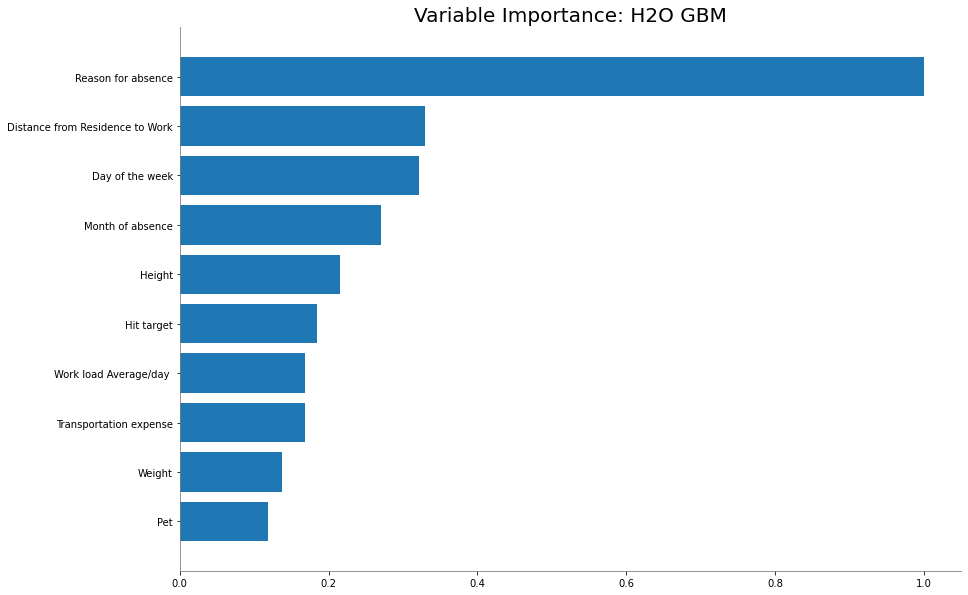

In [48]:
out_2.varimp_plot()

In [55]:
out_3 = h2o.get_model(model_ids[2])
out_3

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_20210910_104116


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,Ridge ( lambda = 2.162E-4 ),"nlambda = 30, lambda.max = 216.16, lambda.min = 2.162E-4, lambda.1...",19,19,30,automl_training_py_2_sid_ad9e




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 122.06766471093755
RMSE: 11.048423630135547
MAE: 5.301218634503807
RMSLE: NaN
R^2: 0.1729249501386223
Mean Residual Deviance: 122.06766471093755
Null degrees of freedom: 441
Residual degrees of freedom: 422
Null deviance: 65234.59728506765
Residual deviance: 53953.9078022344
AIC: 3419.9640430876193

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 154.472022913759
RMSE: 12.428677440249183
MAE: 5.245446058154258
RMSLE: NaN
R^2: 0.16163639677202668
Mean Residual Deviance: 154.472022913759
Null degrees of freedom: 112
Residual degrees of freedom: 93
Null deviance: 20844.575807211157
Residual deviance: 17455.338589254767
AIC: 932.20157733207

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,alpha,iterations,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2021-09-10 10:41:16,0.000 sec,1,.22E3,20,147.403992,184.302036,0.0,NaN,,,,,,,,
1,,2021-09-10 10:41:16,0.002 sec,2,.13E3,20,147.292037,184.203399,0.0,NaN,,,,,,,,
2,,2021-09-10 10:41:16,0.002 sec,3,.83E2,20,147.113743,184.045992,0.0,NaN,,,,,,,,
3,,2021-09-10 10:41:16,0.002 sec,4,.52E2,20,146.831926,183.796684,0.0,NaN,,,,,,,,
4,,2021-09-10 10:41:16,0.002 sec,5,.32E2,20,146.390722,183.404777,0.0,5.0,11.0484,122.068,5.30122,0.172925,12.4287,154.472,5.24545,0.161636
5,,2021-09-10 10:41:16,0.002 sec,6,.2E2,20,145.711584,182.797634,0.0,NaN,,,,,,,,
6,,2021-09-10 10:41:16,0.002 sec,7,.12E2,20,144.691877,181.877254,0.0,NaN,,,,,,,,
7,,2021-09-10 10:41:16,0.002 sec,8,.77E1,20,143.216116,180.526037,0.0,NaN,,,,,,,,
8,,2021-09-10 10:41:16,0.010 sec,9,.48E1,20,141.188532,178.630550,0.0,NaN,,,,,,,,
9,,2021-09-10 10:41:16,0.010 sec,10,.3E1,20,138.589881,176.128660,0.0,NaN,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Weight,5.705153,1.000000,0.185714
1,Height,3.974777,0.696699,0.129387
2,Disciplinary failure,3.908720,0.685121,0.127237
3,Body mass index,3.904796,0.684433,0.127109
4,Reason for absence,3.891495,0.682102,0.126676
5,Month of absence,1.240726,0.217475,0.040388
6,Social smoker,1.059155,0.185649,0.034478
7,Education,1.033222,0.181103,0.033633
8,Day of the week,0.992151,0.173904,0.032296
9,Son,0.884002,0.154948,0.028776


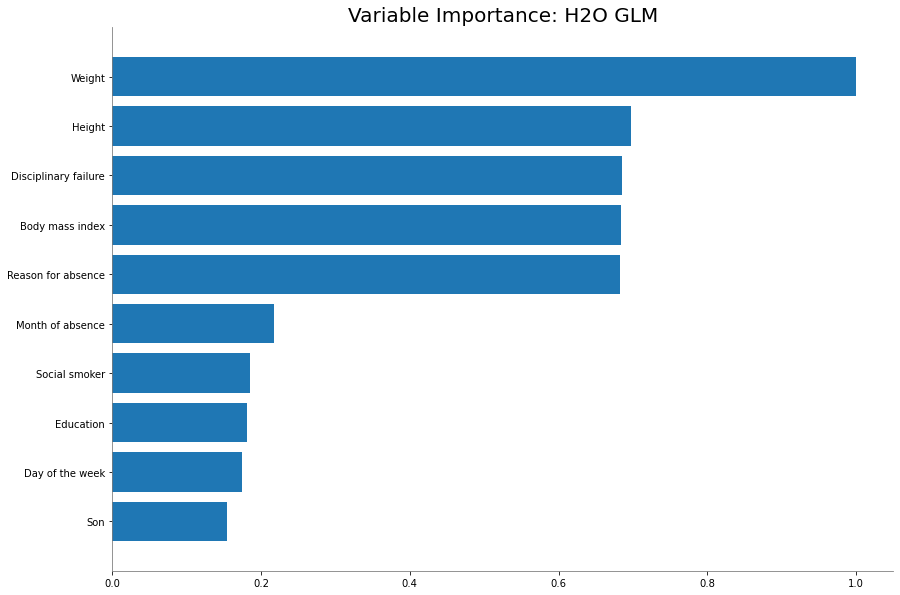

In [56]:
out_3.varimp_plot()

### Exporting Model

In [32]:
aml.leader.download_mojo(path = "./")

'C:\\King\\Code\\Assignmenet ICICI Lombard\\DRF_1_AutoML_20210910_103208.zip'